In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Part 1: Prepare the Data

In [45]:
## Data prepare
# Reads the csv into panda
df=pd.read_csv("Resources/myopia.csv")

labels = df['MYOPIC']
# Previews the DataFrame
df.head(3)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0


In [6]:
# Removes the MYOPIC column from the dataset
df1=df.drop(labels='MYOPIC',axis=1)
df1.head(3)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0


In [21]:
# Standardises the dataset using a scaler
scaler = StandardScaler()
scaler.fit(df1)
# Names the resulting DataFrame X
X = scaler.transform(df1)

In [35]:
## Dimensionality Reduction

# PCA model is created and used to reduce dimensions of the scaled dataset
# Initialise PCA model
pca = PCA(n_components=0.9)

# Get two principal components for the iris data.
myopia_pca = pca.fit_transform(X)

# # Transform PCA data to a DataFrame
# df_myopia_pca = pd.DataFrame(
#     data=myopia_pca, columns=["principal component 1", "principal component 2"]
# )
# df_myopia_pca.head()

In [39]:
# PCA model’s explained variance is set to 90% (0.9) 
pca.explained_variance_ratio_.sum()

0.9187361702915187

### Part 2: Apply Dimensionality Reduction

In [40]:
## Dimensionality Reduction
# The shape of the reduced dataset is examined for reduction in number of features
myopia_pca.shape

(618, 10)

In [42]:
## t-SNE model is created and used to reduce dimensions of the scaled dataset
tsne = TSNE(learning_rate=250, n_components=3, perplexity=50, verbose=1, n_iter=2500)
#Reduce dimensions
tsne_features = tsne.fit_transform(myopia_pca)

c:\Users\chun\anaconda3\envs\mlenv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 618 samples in 0.007s...
[t-SNE] Computed neighbors for 618 samples in 0.070s...
[t-SNE] Computed conditional probabilities for sample 618 / 618
[t-SNE] Mean sigma: 1.438866
[t-SNE] KL divergence after 250 iterations with early exaggeration: 101.405823
[t-SNE] KL divergence after 2500 iterations: 1.992956


In [43]:
# Get the shape of features after reduction
tsne_features.shape

(618, 3)

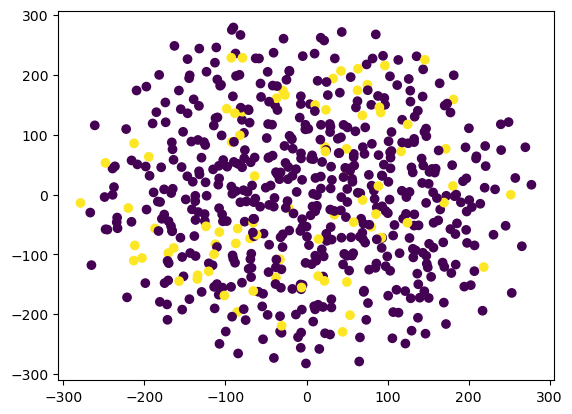

In [46]:
# t-SNE is used to create a plot of the reduced features
plt.scatter(tsne_features[:,0],tsne_features[:,1],c=labels)

### Part 3: Perform a Cluster Analysis with K-means

In [48]:
## Clustering
# A K-means model is created
# A for- loop is used to create a list of inertias for each k from 1 to 10, inclusive
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)


c:\Users\chun\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


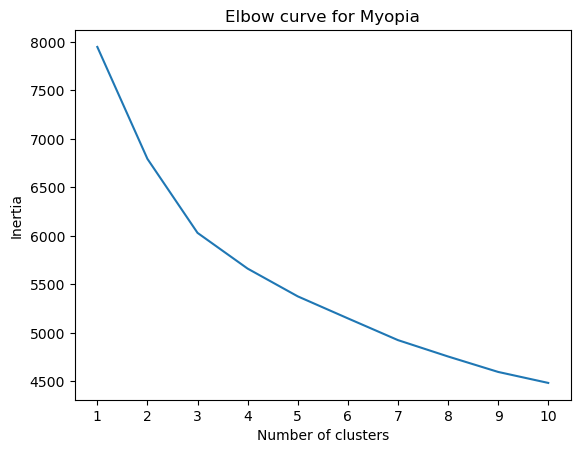

In [49]:
# A plot is created to examine any elbows that exist 
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Myopia')
plt.show()

In [58]:
# Create a DataFrame from the PCA transformed data for K-Means modelling and plotting
columns=[]
for i in range(len(pca.components_)):
#    columns.append(f"principal component {i+1}")
    columns.append(i+1)
pca_df = pd.DataFrame(myopia_pca, columns=columns)
pca_df['class']= km.labels_
pca_df.head()

,1,2,3,4,5,6,7,8,9,10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,6
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,2
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,8
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,6
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,2


c:\Users\chun\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
c:\Users\chun\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


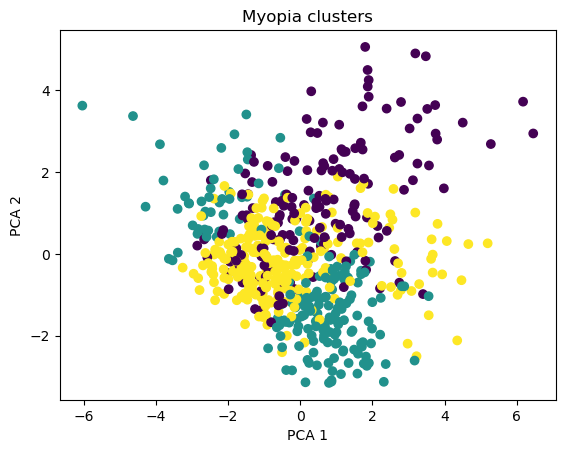

In [59]:
# Check the elbow plot, the k value is 3
# Initialize the K-Means model with n_clusters 3
model = KMeans(n_clusters=3, random_state=0)

# Train the model
model.fit(pca_df)

# Predict clusters
predictions = model.predict(pca_df)

# Add predicted clusters (labels) to DataFrame
pca_df['class'] = model.labels_
# Plot the Clusters
plt.scatter(x=pca_df[1], y=pca_df[2], c=pca_df['class'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Myopia clusters')
plt.show()

### Part 4: Make a Recommendation
Looking at elbow cure we can say that there aren't any highly differentiated cluster.
Same can be concluded from the scatter plot generated from the t-SNE features. We can also see that myopic and non-myopic data is blended togethere and are not forming any differentaible cluster.